In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym

In [13]:
X=np.array([1.4,3.5,5.6])
Y=np.array([0.4007954931819738,0.594128102489774,0.29802795523938164])

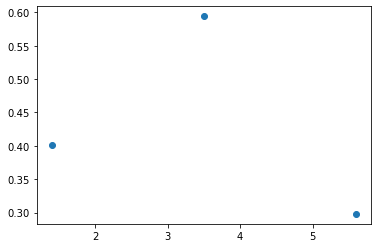

In [14]:
plt.scatter(X,Y)

In [15]:
def BasesLag(x,X,i):
    
    L = 1
    
    for j in range(X.shape[0]):
        if i != j:
            L *= (x - X[j])/(X[i]-X[j])
            
    return L
def Interpolar(x,X,Y):
    
    Polinomio = 0
    
    for i in range(X.shape[0]):
        Polinomio += BasesLag(x,X,i)*Y[i]
        
    return Polinomio

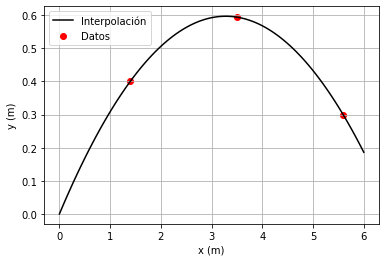

In [16]:
x = np.linspace(0.,6.,100)
y = Interpolar(x,X,Y)

plt.plot(x,y,color='k',label='Interpolación')
plt.scatter(X,Y,color='r',marker='o',label='Datos')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.legend()
plt.grid()

In [17]:
#Como la velocidad en x es cte v_x=v_0x*t. De aqui parametrizaremos t=x/v_0x
#Tambien es de fijarse que v_0y=v_0*sin(a)  y  v_0x=v_0*cos(a), entonces tan(a)=v_0y/v_0x
#Con la parametrización anterior se tiene entonces que y=h+tan(a)x+0.5*(x/v_0x)^2

In [18]:
_x= sym.Symbol('x',real=True)
f = Interpolar(_x,X,Y)
f = sym.simplify(f)
f

x*(0.363970234266202 - 0.0554912422401579*x)

In [19]:
def Derivar(y,x)->list:
    h=x[1]-x[0]
    df=[]
    for i in range(len(x)-1):
        d=(y[i+1]-y[i])/h
        df.append(d)
    return df


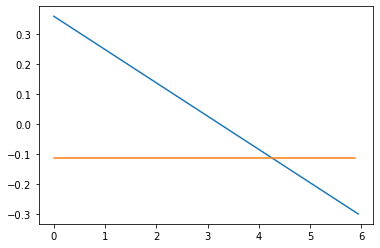

In [20]:
dy_dx=Derivar(y,x) #Fijemonos que dy/dx es equivalente a tener (dy/dt)/(dx/dt) o sea la velocidad en y sobre la de x
d2y_dx=Derivar(dy_dx,x[:-1]) #La constante resultante de derivar 2 veces la función será g/(v_0x^2)
plt.plot(x[:-1],dy_dx,x[:-2],d2y_dx)

In [21]:
angulo=np.rad2deg(np.arctan(dy_dx[0])) #El ángulo inicial sera el arcotangente de la relación de volocidades iniciales
angulo
v_0x=np.sqrt(-9.8/d2y_dx[0])
v_0=v_0x/(np.cos(np.deg2rad(angulo)))
v_0

9.989235330091395

In [22]:
print('La velocidad inicial de la bala es de: ' +str(np.round(v_0,2))+' m/s a un angulo de salida: '+str(np.round(angulo,2)))



La velocidad inicial de la bala es de: 9.99 m/s a un angulo de salida: 19.83
